In [6]:
import numpy as np
onlyO = True

Extract the Data from file "HISTORY"

In [7]:
file = open("HISTORY", "r"); file.readline() # skip name line
line = file.readline() # read second line, contain the number of atoms
a,b,c = [float(comp) for comp in line.split() if comp.replace('.', '', 1).isdigit()] #a: trejectory, b: boundary, c: number of atoms
# read and convert the components to float
#print(stepc[1])
L = np.zeros((3))
if onlyO:
    dat = np.zeros((int((c + 1)/3),int(a + 1),3)) #[number of atoms, number of (r,v,a), 3]
dats = []
while True:
    line = file.readline()
    #print(line)
    if not line:
        break
    stepc = [float(comp) for comp in line.split() if comp.replace('.', '', 1).isdigit()]
    
    L[0] = (file.readline().split()[0])
    L[1] = (file.readline().split()[1])
    L[2] = (file.readline().split()[2])
    #print(L)
    ni = -1
    for n in range(int(stepc[1])):
        line = file.readline().strip()  # Strip leading/trailing whitespace
        if line.startswith("OW"):
            ni += 1
            for i in range(int(a)+1):
                line = file.readline().strip()
                dat[ni,i,:] = np.fromstring(line, sep=' ')
        else:
            for i in range(int(a)+1):
                file.readline()
    #print(dat[0,0,:])
    dats.append(dat.copy())
print(dats[-1][0,0,:]) #dats[step][atom][r,v,a][x,y,z]


[-4.5088 10.509  10.181 ]


Data stored in dats in the format [time step][index of atom][r,v,a depend on the traj][x,y,z components].
Calculating the distant between two atoms by using the outer substract:
\begin{align}
x_{12} &= x_{1} - x_{2}\\
y_{12} &= y_{1} - y_{2}\\
z_{12} &= z_{1} - z_{2}\\
r_{12}^2 &= x_{12}^2 + y_{12}^2 + z_{12}^2
\end{align}

In [8]:
r12 = np.zeros((len(dats), len(dats[0][:,0,:]), len(dats[0][:,0,:])))
for t in range(len(dats)):
    coords = dats[t][:,0,:]
    #x12 = np.zeros((len(coords), len(coords)))
    #y12 = np.zeros((len(coords), len(coords)))
    #z12 = np.zeros((len(coords), len(coords)))
    #
    #for i in range(len(coords)):
    #    for j in range(len(coords)):
    #        x12[i, j] = coords[i, 0] - coords[j, 0]
    #        y12[i, j] = coords[i, 1] - coords[j, 1]
    #        z12[i, j] = coords[i, 2] - coords[j, 2]
    #
    x12 = np.subtract.outer(coords[:,0], coords[:,0])
    y12 = np.subtract.outer(coords[:,1], coords[:,1])
    z12 = np.subtract.outer(coords[:,2], coords[:,2])
    
    # Minimum image convention
    x12[x12 > L[0]/2.] -= L[0]; x12[x12 < -L[0]/2.] += L[0]
    y12[y12 > L[1]/2.] -= L[1]; y12[y12 < -L[1]/2.] += L[1]
    z12[z12 > L[2]/2.] -= L[2]; z12[z12 < -L[2]/2.] += L[2]
    r12[t] = np.sqrt(x12**2 + y12**2 + z12**2)
    
print(r12[-1,:,:])

[[0.         3.65245497 2.65590935 2.92522201 4.05351808 3.41948   ]
 [3.65245497 0.         4.13451167 4.88464276 2.64050315 2.74570853]
 [2.65590935 4.13451167 0.         4.88018109 2.66955235 5.05530915]
 [2.92522201 4.88464276 4.88018109 0.         5.88428002 2.77292177]
 [4.05351808 2.64050315 2.66955235 5.88428002 0.         4.70170246]
 [3.41948    2.74570853 5.05530915 2.77292177 4.70170246 0.        ]]


Text(0.5, 1.0, 'Density Histogram of Atomic Distances')

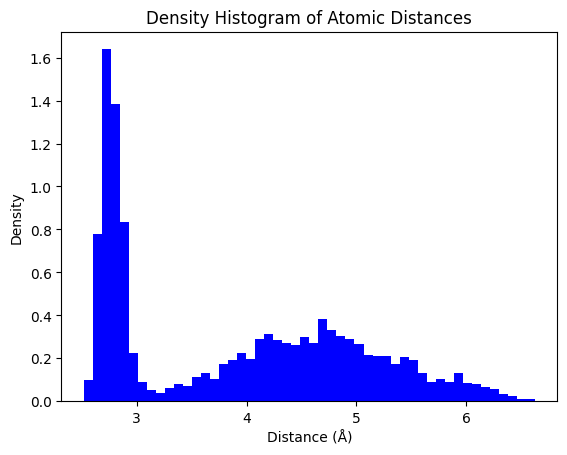

In [19]:
import matplotlib.pyplot as plt
r12off =[]
for i in range(len(r12)):
    r12off.append(r12[i][np.triu_indices(int(len(r12[0][0,:])), k = 1)]) #take the upper triangle of the matrix
#not count the diagonal, and the lower triangle
plt.hist(np.concatenate(r12off), bins=50, density=True, color='blue')
plt.xlabel('Distance (Å)')
plt.ylabel('Density')
plt.title('Density Histogram of Atomic Distances')